KNN

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

### Dataset:


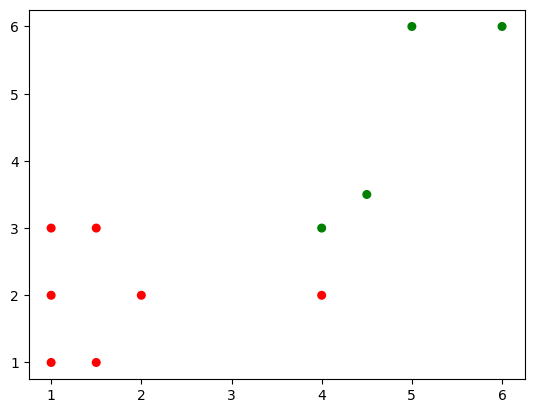

In [3]:
X = np.array([[1,2],[1, 3], [1,1], [1.5, 1], [1.5,3], [2, 2], [4,2 ], [4,3], [4.5, 3.5], [5, 6],[6,6]]) 
y = np.array([0,0, 0, 0, 0, 0, 0, 1, 1, 1,1])
rgb = np.array(['r', 'g', 'b'])
# plot the blobs using a scatter plot and use color coding
plt.scatter(X[:, 0], X[:, 1], s=30, color=rgb[y])
plt.show()

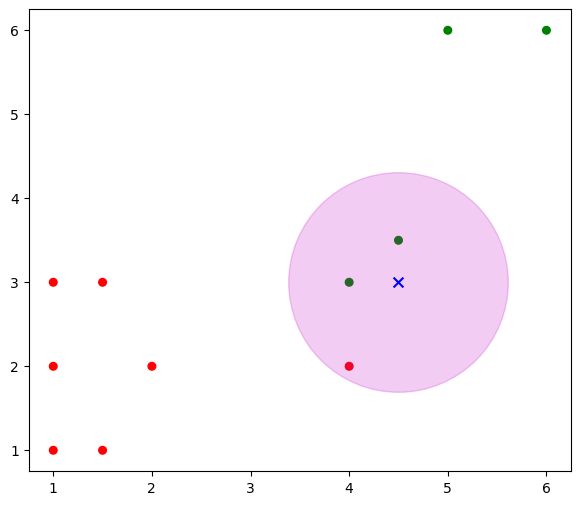

In [4]:
X_test = np.array([[4.5,3]])
plt.figure(num=None, figsize=(7,6), facecolor='w', edgecolor='k')
plt.scatter(X[:, 0], X[:, 1], s=30, color=rgb[y])
plt.scatter(X_test[:, 0], X_test[:, 1], color = 'm', marker = 'o', s =25000, alpha = 0.2)
plt.scatter(X_test[:, 0], X_test[:, 1], color='b',   marker = 'x', s=50,)
plt.show()

In [5]:
##Testing
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)
print(model.predict(X_test))

[1]


In [6]:
print(model.kneighbors(X_test))
kneighbors = model.kneighbors(X_test)[1]
print("KNeighbors",  kneighbors)
print("Class Label of KNeighbors", y[kneighbors])
print("Ratios of Classes in KNeighbors", model.predict_proba(X_test))  #All k neighbors belong to class 1

(array([[0.5       , 0.5       , 1.11803399]]), array([[8, 7, 6]], dtype=int64))
KNeighbors [[8 7 6]]
Class Label of KNeighbors [[1 1 0]]
Ratios of Classes in KNeighbors [[0.33333333 0.66666667]]


[0]


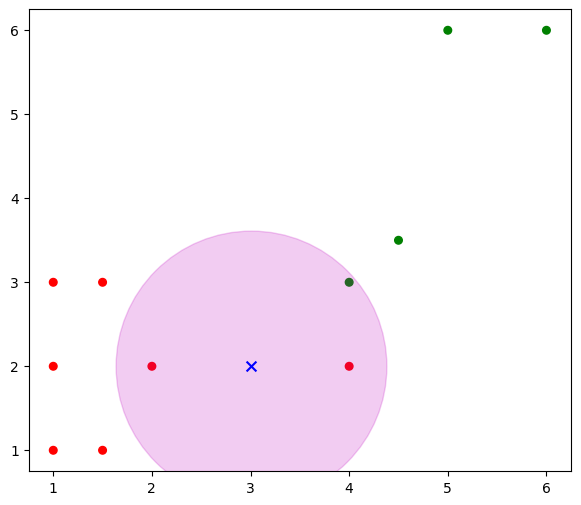

In [7]:
plt.figure(num=None, figsize=(7,6), facecolor='w', edgecolor='k')

X_test = np.array([[3,2]])
print(model.predict(X_test))
plt.scatter(X[:, 0], X[:, 1], s=30, color=rgb[y])
plt.scatter(X_test[:, 0], X_test[:, 1], color = 'm', marker = 'o', s = 38000, alpha = 0.2)
plt.scatter(X_test[:, 0], X_test[:, 1], color='b',   marker = 'x', s=50,)
plt.show()

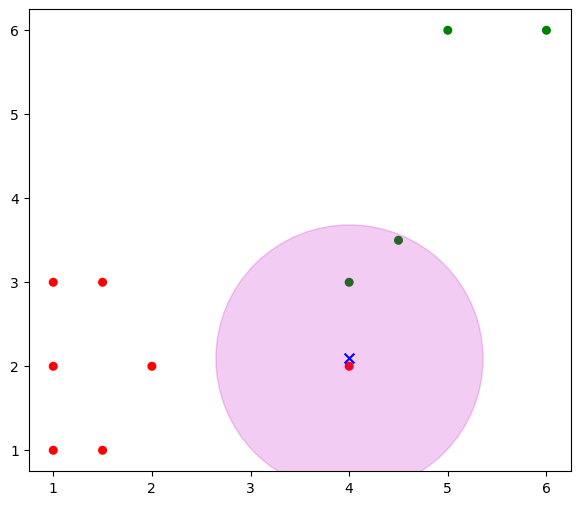

[0]


In [8]:
X_test = np.array([[4,2.1]])
plt.figure(num=None, figsize=(7,6), facecolor='w', edgecolor='k')
plt.scatter(X[:, 0], X[:, 1], s=30, color=rgb[y])
plt.scatter(X_test[:, 0], X_test[:, 1], color = 'm', marker = 'o', s =37000, alpha = 0.2)
plt.scatter(X_test[:, 0], X_test[:, 1], color='b',   marker = 'x', s=50,)
plt.show()

model = KNeighborsClassifier(n_neighbors=3,weights='distance')
model.fit(X, y)
print(model.predict(X_test))

In [9]:
model = KNeighborsClassifier(n_neighbors=3,weights='distance')
model.fit(X, y)
print(model.predict(X_test))

[0]


In [10]:
kdistances = model.kneighbors(X_test)[0]
kneighbors = model.kneighbors(X_test)[1]
print("KNeighbors Distances",  kdistances)
print("Class Label of KNeighbors", y[kneighbors])
print("Ratios of Classes in KNeighbors", model.predict_proba(X_test))

KNeighbors Distances [[0.1        0.9        1.48660687]]
Class Label of KNeighbors [[0 1 1]]
Ratios of Classes in KNeighbors [[0.84862384 0.15137616]]


In [11]:
print("KNeighbors",  kneighbors)
kdistances = model.kneighbors(X_test)[0]
print("KNeighbors Distances",  kdistances)
votes = 1/kdistances
print("Votes",  votes)
print("Votes/Sum_of_votes",votes/np.sum(votes))
print("KNeighbors Distances",  kdistances)
print("Class Label of KNeighbors", y[kneighbors])
print("Ratios of Classes in KNeighbors", model.predict_proba(X_test))

KNeighbors [[6 7 8]]
KNeighbors Distances [[0.1        0.9        1.48660687]]
Votes [[10.          1.11111111  0.67267279]]
Votes/Sum_of_votes [[0.84862384 0.09429154 0.05708462]]
KNeighbors Distances [[0.1        0.9        1.48660687]]
Class Label of KNeighbors [[0 1 1]]
Ratios of Classes in KNeighbors [[0.84862384 0.15137616]]


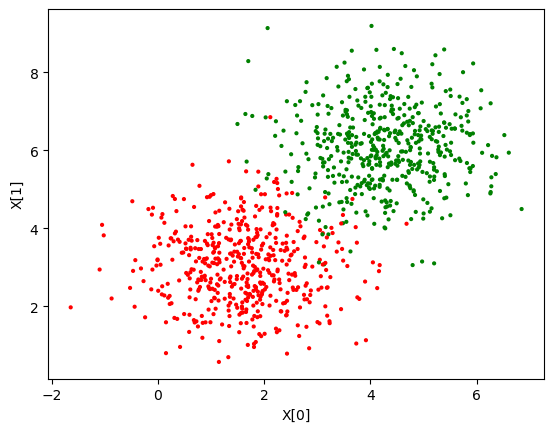

In [12]:
class_centers = np.array([[1.6,3],[4.2,6]])
X, y = make_blobs(n_samples = 1000, centers = class_centers, n_features = 2,random_state=42)
rgb = np.array(['r', 'g', 'b'])
# plot the blobs using a scatter plot and use color coding
plt.scatter(X[:, 0], X[:, 1], s=4, color=rgb[y])
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.show()

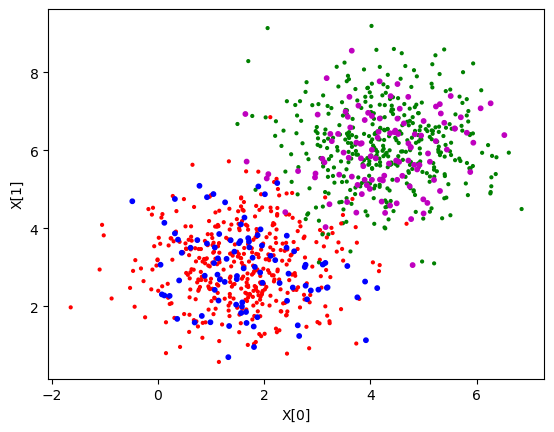

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
rgb = np.array(['r', 'g'])
rgb2 = np.array(['b','m'])
# plot the blobs using a scatter plot and use color coding
plt.scatter(X_train[:, 0], X_train[:, 1], s=4, color=rgb[y_train])
plt.scatter(X_test[:, 0], X_test[:, 1], s=10, color=rgb2[y_test])
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.show()

In [14]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

Testing Accuracy: 0.965


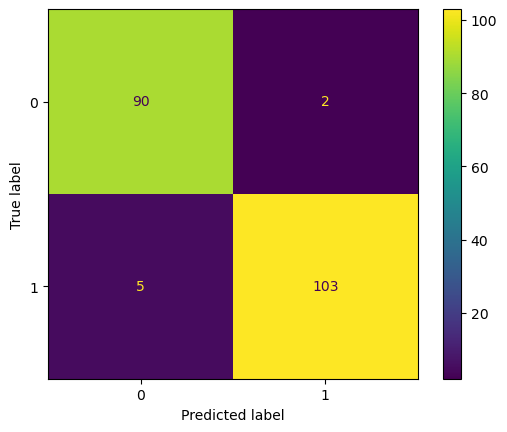

In [15]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(scores)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.975 0.965 0.96  0.97  0.96 ]
0.97 accuracy with a standard deviation of 0.01


## Use L1 distance as the distance metric for KNN

In [17]:
model = KNeighborsClassifier(n_neighbors=3, p=1) #L1_norm
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

Testing Accuracy: 0.96


## Weighted Voting

In [18]:
model = KNeighborsClassifier(n_neighbors=3, weights ='distance') #L2_norm
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

Testing Accuracy: 0.96


# Different distance measures: 
# L1 norm, Manhattan Distance
### For two points in $d$ dimensions $p=[p_1,p_2,\cdots,p_d]$ and $q=[q_1,q_2,\cdots,q_d]$,
### the manhattan distance is the sum of the absolute difference of the coordinates.

## $L_1(p,q)=\sum_{i=1}^d \big | p_i-q_i \big |$

# L2 norm, Euclidean Distance

## $L_2(p,q)=\sqrt{\sum_{i=1}^d (p_i-q_i)^2}$

# Minskowsky Distance

## $L_p(p,q)=\sqrt[p]{\sum_{i=1}^d |p_i-q_i|^p}$

## $L_p(p,q)= \bigg ( {\sum_{i=1}^d (p_i-q_i)^p} \bigg )^{\frac{1}{p}}$



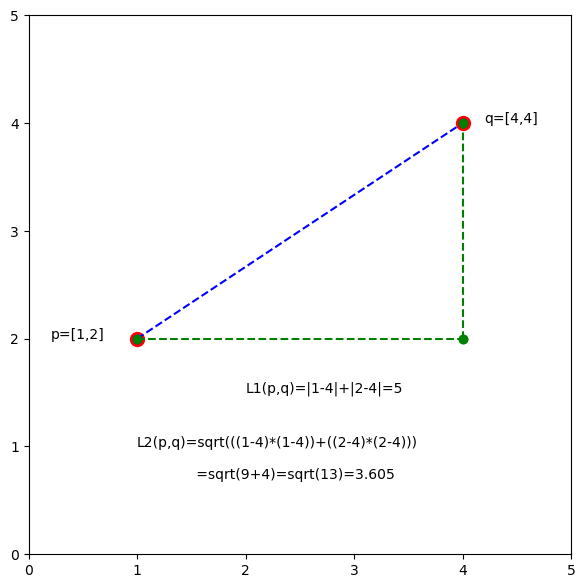

In [19]:
plt.figure(figsize=(7,7))
X = np.array([[1, 2],[4,4]])
plt.scatter(X[:, 0], X[:, 1], s=100, color='r')
#plt.grid()
plt.text(.2,2,"p=[1,2]")
plt.text(4.2,4,"q=[4,4]")
plt.text(2,1.5,"L1(p,q)=|1-4|+|2-4|=5")
plt.text(1,1,"L2(p,q)=sqrt(((1-4)*(1-4))+((2-4)*(2-4)))")
plt.text(1.3,.7,"      =sqrt(9+4)=sqrt(13)=3.605")
plt.plot([1,4],[2,4], 'bo', linestyle="--")
plt.plot([1,4],[2,2], 'go', linestyle="--")
plt.plot([4,4],[2,4], 'go', linestyle="--")

plt.xlim((0, 5))  
plt.ylim((0, 5))  
plt.show()

In [20]:
p=np.array([1,2])
q = np.array([4,4])
L1_p_q = np.sum(np.abs(p-q))
print("L1(p,q)",L1_p_q)
L2_p_q = np.sqrt(np.sum((p-q)**2))
print("L2(p,q)",L2_p_q)

L1(p,q) 5
L2(p,q) 3.605551275463989


## Visualizing distances

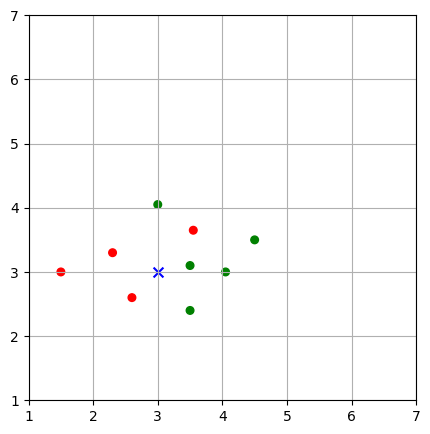

In [21]:
plt.figure(figsize=(5,5))
X = np.array([[2.6, 2.6], [1.5,3], [2.3,3.3], [3.55,3.65],[3.5,3.1],  [4.05,3],[3,4.05], [4.5, 3.5], [3.5,2.4]]) 
y = np.array([0,0,0, 0, 1, 1, 1,1,1])
X_test = np.array([[3,3]])
rgb = np.array(['r', 'g', 'b'])
plt.scatter(X[:, 0], X[:, 1], s=30, color=rgb[y])
plt.scatter(X_test[:, 0],X_test[:, 1], s=50,marker='x', color='b')
plt.grid()
plt.xlim((1, 7))   # set the xlim to left, right
plt.ylim((1, 7))   # set the ylim to left, right
plt.show()

## Different distance measures might give different answers

In [22]:
model = KNeighborsClassifier(n_neighbors=5) #L2_norm
model.fit(X, y)
print("Using Euclidean Distance, Predicted class Label for",X_test[0], "is" ,model.predict(X_test))

model = KNeighborsClassifier(n_neighbors=5,p=1) #L1_norm
model.fit(X, y)
print("Using L1 Distance, Predicted class Label for",X_test[0], "is" ,model.predict(X_test))

Using Euclidean Distance, Predicted class Label for [3 3] is [0]
Using L1 Distance, Predicted class Label for [3 3] is [1]


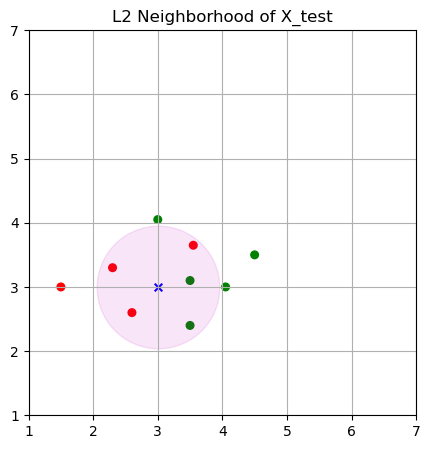

In [23]:
plt.figure(figsize=(5,5))
rgb = np.array(['r', 'g', 'b'])
plt.scatter(X[:, 0], X[:, 1], s=30, color=rgb[y])
plt.scatter(X_test[:, 0],X_test[:, 1], s=30,marker='x', color='b')
plt.scatter(X_test[:, 0],X_test[:, 1], s=7800,marker='o', color='m', alpha = 0.1)
plt.grid()
plt.xlim((1, 7))   # set the xlim to left, right
plt.ylim((1, 7))   # set the ylim to left, right
plt.title("L2 Neighborhood of X_test")
plt.show()

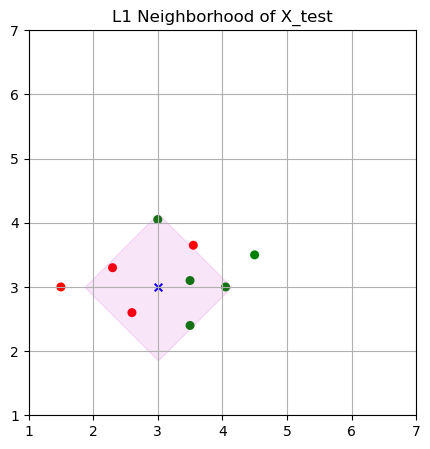

In [24]:
plt.figure(figsize=(5,5))
rgb = np.array(['r', 'g', 'b'])
plt.scatter(X[:, 0], X[:, 1], s=30, color=rgb[y])
plt.scatter(X_test[:, 0],X_test[:, 1], s=30,marker='x', color='b')
plt.scatter(X_test[:, 0],X_test[:, 1], s=5600,marker='D', color='m', alpha = 0.1)
plt.grid()
plt.xlim((1, 7))
plt.ylim((1, 7))
plt.title("L1 Neighborhood of X_test")
plt.show()

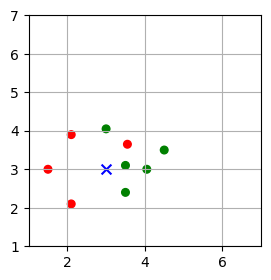

In [25]:
plt.figure(figsize=(3,3))
X = np.array([[2.1, 2.1], [1.5,3], [2.1,3.9], [3.55,3.65],[3.5,3.1],  [4.05,3],[3,4.05], [4.5, 3.5], [3.5,2.4]]) 
y = np.array([0,0,0, 0, 1, 1, 1,1,1])
X_test = np.array([[3,3]])
rgb = np.array(['r', 'g', 'b'])
plt.scatter(X[:, 0], X[:, 1], s=30, color=rgb[y])
plt.scatter(X_test[:, 0],X_test[:, 1], s=50,marker='x', color='b')
plt.grid()
plt.xlim((1, 7))   # set the xlim to left, right
plt.ylim((1, 7))   # set the ylim to left, right
plt.show()

In [26]:
model = KNeighborsClassifier(n_neighbors=5) #L2_norm
model.fit(X, y)
print("Using Euclidean Distance, Predicted class Label for",X_test[0], "is" ,model.predict(X_test))

model = KNeighborsClassifier(n_neighbors=5,p=10**6) #L1000000_norm
model.fit(X, y)
print("Using L_infinity Distance, Predicted class Label for",X_test[0], "is" ,model.predict(X_test))

Using Euclidean Distance, Predicted class Label for [3 3] is [1]
Using L_infinity Distance, Predicted class Label for [3 3] is [0]


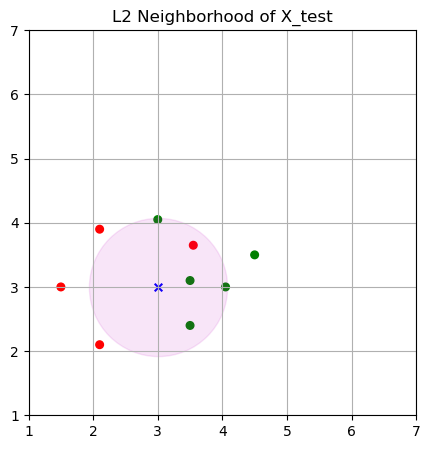

In [27]:
plt.figure(figsize=(5,5))
rgb = np.array(['r', 'g', 'b'])
plt.scatter(X[:, 0], X[:, 1], s=30, color=rgb[y])
plt.scatter(X_test[:, 0],X_test[:, 1], s=30,marker='x', color='b')
plt.scatter(X_test[:, 0],X_test[:, 1], s=9900,marker='o', color='m', alpha = 0.1)
plt.grid()
plt.xlim((1, 7))   # set the xlim to left, right
plt.ylim((1, 7))   # set the ylim to left, right
plt.title("L2 Neighborhood of X_test")
plt.show()

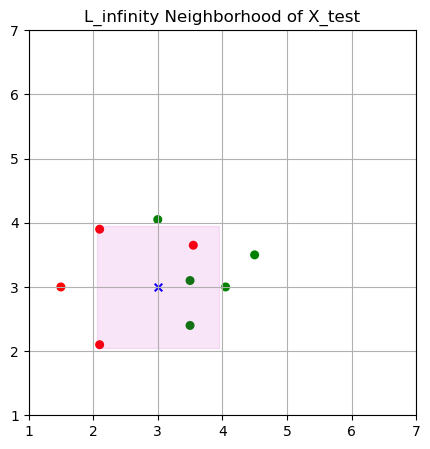

In [28]:
plt.figure(figsize=(5,5))
rgb = np.array(['r', 'g', 'b'])
plt.scatter(X[:, 0], X[:, 1], s=30, color=rgb[y])
plt.scatter(X_test[:, 0],X_test[:, 1], s=30,marker='x', color='b')
plt.scatter(X_test[:, 0],X_test[:, 1], s=7600,marker='s', color='m', alpha = 0.1)
plt.grid()
plt.xlim((1, 7))
plt.ylim((1, 7))
plt.title("L_infinity Neighborhood of X_test")
plt.show()

## Image Classification with KNN

In [29]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data 
y = digits.target
print("X_shape", X.shape, "\ny_shape",y.shape)

X_shape (1797, 64) 
y_shape (1797,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print("Training Data",X_train.shape)
print("Testing Data",X_test.shape)

Training Data (1437, 64)
Testing Data (360, 64)


In [31]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

Testing Accuracy: 0.9666666666666667
